<a href="https://colab.research.google.com/github/elemnurguner/data-ai-projects/blob/main/Titanikveriseti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🌊 Titanik Sağ Kalım Tahmini Projesi: Adım Adım Açıklama
Bu proje, Titanik yolcularının sağ kalımını tahmin etmek için bir makine öğrenimi modeli oluşturmayı amaçlar.
Kullanılan teknikler: Veri temizleme, ön işleme, lojistik regresyon ve model değerlendirme.

🎯 Projenin Amacı
Titanik veri setini kullanarak yolcuların hayatta kalıp kalmayacağını tahmin eden bir model geliştirmek ve veri bilimi sürecini (veri temizleme, ön işleme, modelleme) adım adım göstermek.

📋 Proje Yapısı
1. Veri Yükleme → 2. Eksik Veri Temizleme → 3. Kategorik Veri Dönüşümü → 4. Model Eğitimi → 5. Değerlendirme

In [ ]:
# Gerekli kütüphaneleri yükle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Veri setini yükle
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# İlk 5 satırı göster
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Veri seti hakkında genel bilgi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Betimsel istatistikler
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Eksik verileri kontrol et
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


2. Eksik Verileri Doldurma veya Temizleme
Eksik verileri doldurmak veya temizlemek için bazı stratejiler uygulayacağız.

In [ ]:
# 'Age' sütunundaki eksik değerleri medyan ile doldur
df['Age'].fillna(df['Age'].median(), inplace=True)

# 'Embarked' sütunundaki eksik değerleri en sık görülen değer ile doldur
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# 'Cabin' sütunundaki eksik değerleri 'Unknown' ile doldur
df['Cabin'].fillna('Unknown', inplace=True)

# Eksik verileri tekrar kontrol et
df.isnull().sum()

3. Kategorik Verileri Sayısallaştırma
Kategorik verileri sayısallaştırmak için pd.get_dummies kullanacağız.

In [ ]:
# Kategorik sütunları sayısallaştır
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# 'Cabin' sütununu kaldır (çok fazla eksik veri var ve karmaşık)
df.drop('Cabin', axis=1, inplace=True)

# 'Name' ve 'Ticket' sütunlarını kaldır (tahmin için gerekli değil)
df.drop(['Name', 'Ticket'], axis=1, inplace=True)

# İlk 5 satırı tekrar göster
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


4. Model Oluşturma ve Tahmin Yapma
Lojistik regresyon modeli kullanarak hayatta kalma tahmini yapacağız.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Bağımsız ve bağımlı değişkenleri ayır
X = df.drop('Survived', axis=1)
y = df['Survived']

# Veri setini eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lojistik regresyon modelini oluştur ve eğit
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Test seti üzerinde tahmin yap
y_pred = model.predict(X_test)

5. Modelin Doğruluğunu Ölçme
Modelin doğruluğunu ölçmek için accuracy skorunu kullanacağız.

In [ ]:
# Modelin doğruluğunu hesapla
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Doğruluğu: {accuracy:.2f}")

Model Doğruluğu: 0.80


Sonuç:
Bu adımları takip ederek, Titanic veri seti üzerinde bir hayatta kalma tahmini modeli oluşturduk ve modelin doğruluğunu ölçtük. Bu temel adımlar, daha karmaşık modeller ve teknikler için bir başlangıç noktası olabilir.

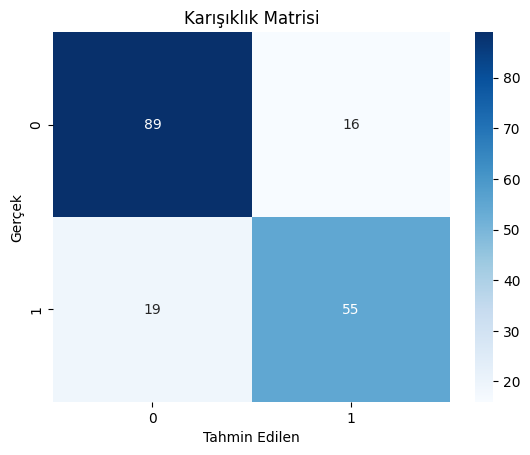

In [ ]:
# Modelin doğruluğunu görselleştir
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Karışıklık Matrisi')
plt.show()